# EFFECTIVE DATA VISUALIZATION IN DATA SCIENCE WITH MATPLOTLIB AND SEABORN

## CODING TASK #1. PLOT PIE CHART USING MATPLOTLIB

- **The plot method on Pandas Series and DataFrames is just a simple wrapper around plt.plot():**
- **Define a Pandas Dataframe with all crypto allocation in a given portfolio**
- **Note that total sum = 100%** 
- **Use matplotlib to plot a pie chart** 

In [1]:
# The plot method on Pandas Series and DataFrames is just a simple wrapper around plt.plot():
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Define a Pandas Dataframe with all crypto allocation in a given portfolio
# Note that total sum = 100% 
crypto_df = pd.DataFrame(data = {'allocation %':[20, 55, 5, 17, 3]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

,allocation %
BTC,20
ETH,55
LTC,5
XRP,17
ADA,3


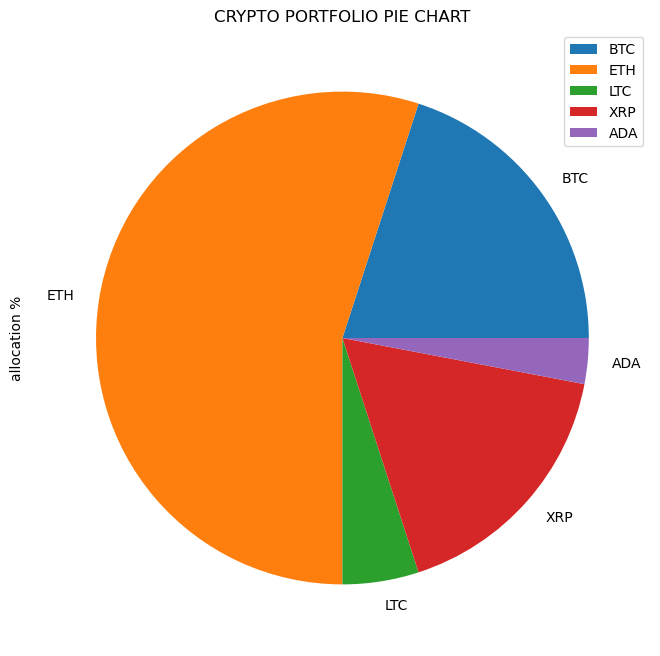

In [3]:
# Use matplotlib to plot a pie chart 
crypto_df.plot.pie(y = 'allocation %', figsize = (8, 8))
plt.title('CRYPTO PORTFOLIO PIE CHART');

**PRACTICE OPPORTUNITY #1:**
- **Assume that you became bullish on XRP and decided to allocate 60% of your assets in it. You also decided to equally divide the rest of your assets in other coins (BTC, LTC, ADA, and ETH). Change the allocations and plot the pie chart.**
- **Use 'explode' to increase the separation between XRP and the rest of the portfolio (External Research is Required)**

In [4]:
crypto_df_new = pd.DataFrame(data = {'allocation %':[10, 10, 10, 60, 10]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df_new

,allocation %
BTC,10
ETH,10
LTC,10
XRP,60
ADA,10


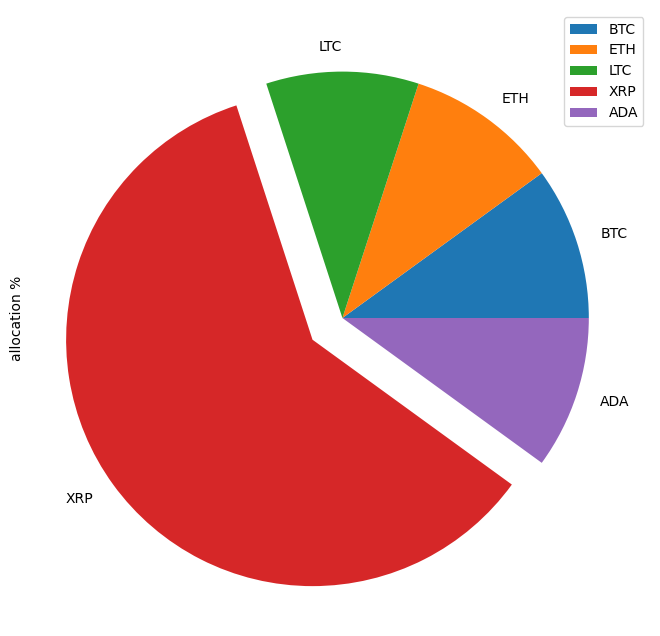

In [5]:
crypto_df_new.plot.pie(y='allocation %',figsize=(8,8),explode=[0,0,0,0.15,0]);

## CODING TASK #2. PLOT SINGLE & MULTIPLE LINE PLOTS USING MATPLOTLIB
- **Use Pandas read_csv to read crypto_daily_prices (BTC, ETH, and LTC)**
- **Use matplotlib on the Pandas DataFrame to plot the data**

In [6]:
df=pd.read_csv('crypto_daily_prices.csv')
cr_dp=df.copy()

In [7]:
cr_dp.head()

,Date,BTC,ETH,ADA
0,9/17/2014,457.334015,NaN,NaN
1,9/18/2014,424.440002,NaN,NaN
2,9/19/2014,394.795990,NaN,NaN
3,9/20/2014,408.903992,NaN,NaN
4,9/21/2014,398.821014,NaN,NaN


In [8]:
cr_dp.Date = cr_dp.Date.astype('datetime64')

In [9]:
cr_dp.Date.dt.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [10]:
cr_dp.Date.dt.year[0]

2014

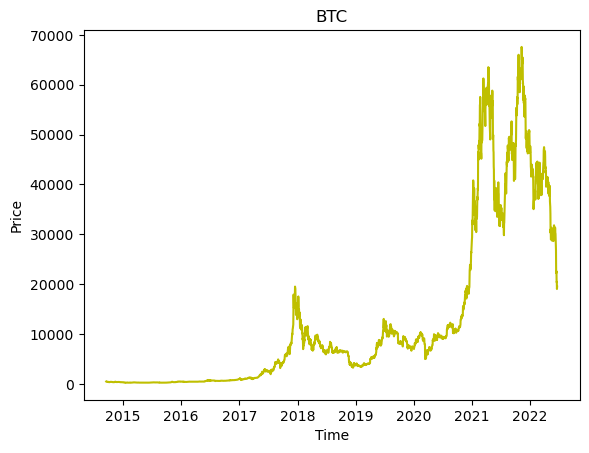

In [11]:
plt.plot(cr_dp.Date,cr_dp.BTC,c='y')
plt.title('BTC')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

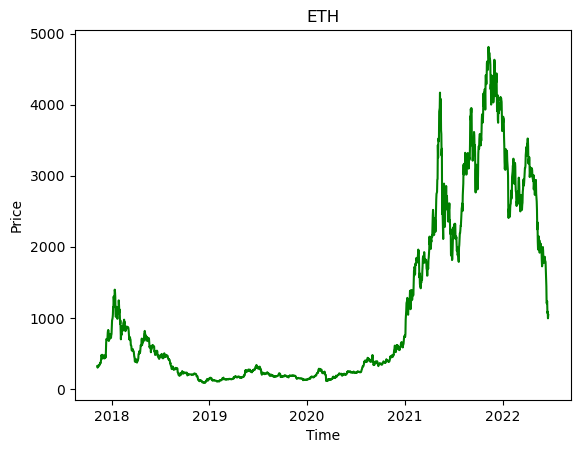

In [12]:
plt.plot(cr_dp.Date,cr_dp.ETH,c='g')
plt.title('ETH')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

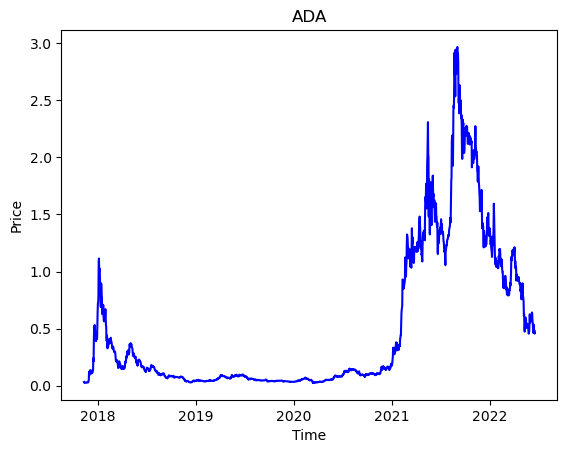

In [13]:
plt.plot(cr_dp.Date,cr_dp.ADA,c='b')
plt.title('ADA')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

**PRACTICE OPPORTUNITY #2:**
- **Use subplots attribute to plot separate figures for BTC, ETH, and ADA**

In [14]:
cr_dp.columns[2]

'ETH'

In [15]:
cr_dp[cr_dp.columns[1]]

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2828    22572.839840
2829    20381.650390
2830    20471.482420
2831    19017.642580
2832    19488.886720
Name: BTC, Length: 2833, dtype: float64

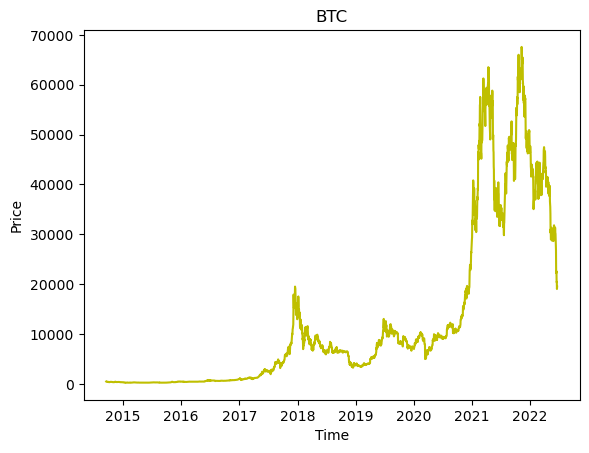

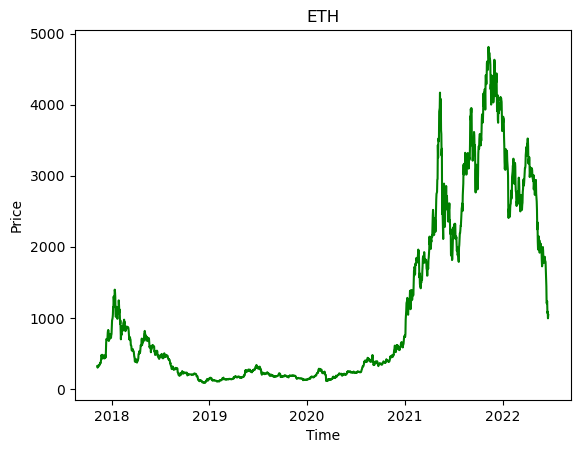

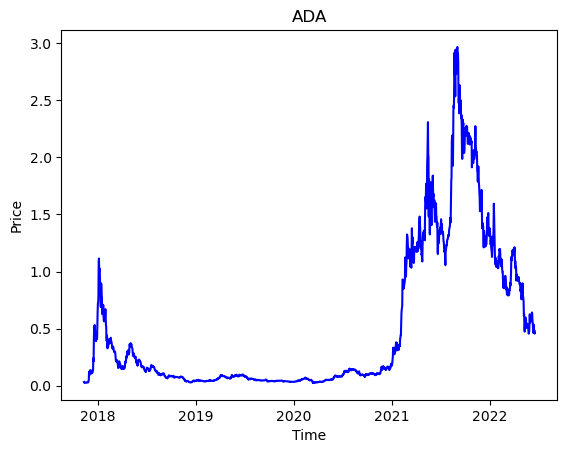

In [16]:
#fig,ax=plt.subplots(3,1)
col_c=['y','g','b']
for i in range(3):
    plt.subplot()    
    plt.plot(cr_dp.Date,cr_dp[cr_dp.columns[i+1]],c=col_c[i])
    plt.title(cr_dp.columns[i+1])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
     

## CODING TASK #3. PLOT SCATTERPLOTS USING MATPLOTLIB
- **Read daily return data using pandas**
- **Plot Daily returns of BTC vs. ETH**

In [26]:
df1 = pd.read_csv('crypto_daily_returns.csv')
cr_dr=df1.copy()
df1

,Date,BTC,ETH,ADA
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,NaN
2,9/19/2014,-6.984264,NaN,NaN
3,9/20/2014,3.573492,NaN,NaN
4,9/21/2014,-2.465854,NaN,NaN
...,...,...,...,...
2828,6/15/2022,1.648355,1.778018,10.097317
2829,6/16/2022,-9.707194,-13.418330,-10.927140
2830,6/17/2022,0.440750,1.759673,2.604094
2831,6/18/2022,-7.101781,-8.548629,-6.403471


In [21]:
data_columns = ["BTC",'ETH','ADA']


In [29]:
cr_dr.Date = cr_dr.Date.astype('datetime64')

In [30]:
cr_dr.set_index('Date',drop=False,inplace=True)

In [31]:
cr_dr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2833 entries, 2014-09-17 to 2022-06-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2833 non-null   datetime64[ns]
 1   BTC     2833 non-null   float64       
 2   ETH     1684 non-null   float64       
 3   ADA     1684 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 110.7 KB


In [32]:
cr_dr_weekly_mean = cr_dr[list(data_columns)].resample('W').mean() #we draw chart with weekly mean based 
cr_dr_weekly_mean.head(3)

,BTC,ETH,ADA
Date,,,
2014-09-21,-2.613837,0.0,0.0
2014-09-28,-0.711103,NaN,NaN
2014-10-05,-2.242674,NaN,NaN


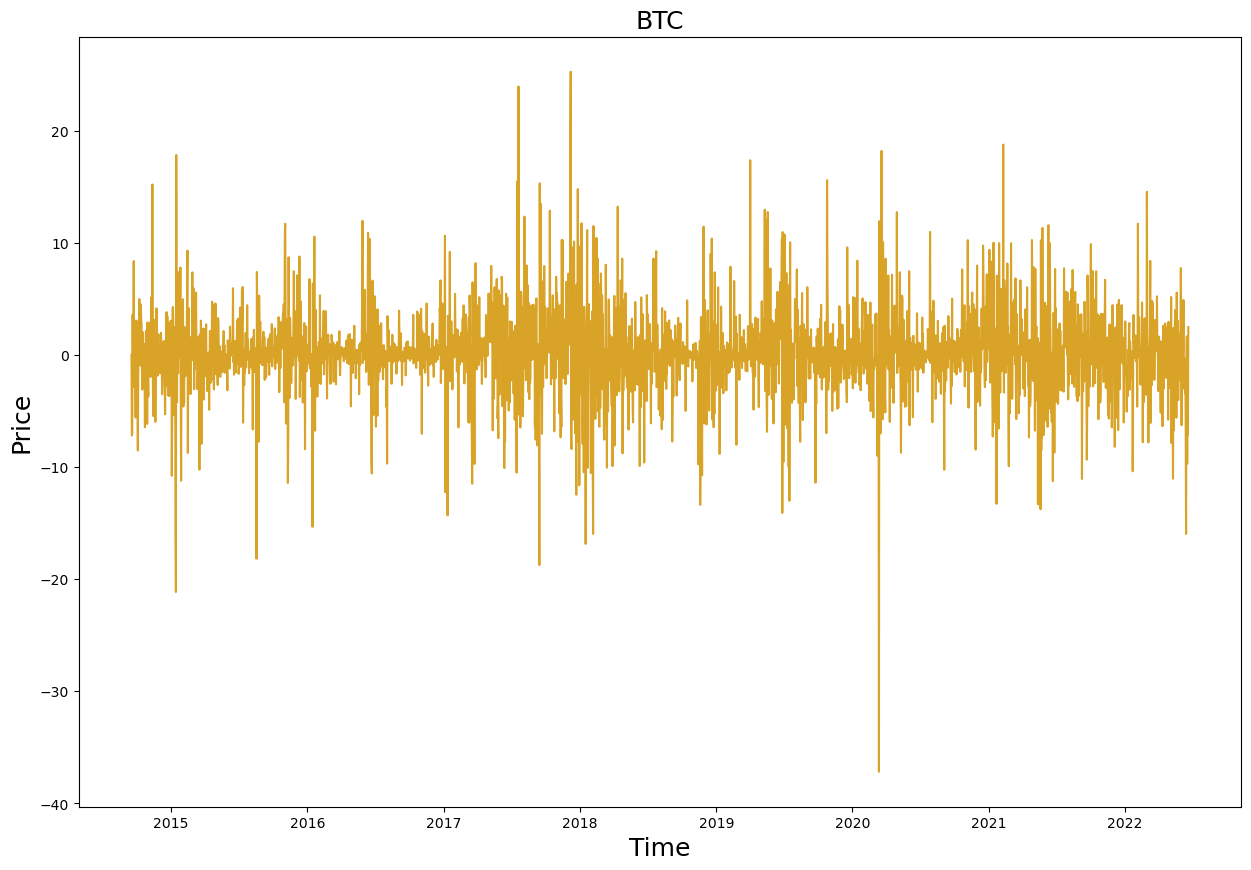

In [33]:
plt.figure(figsize=(15,10))
plt.plot(cr_dr.Date,cr_dr.BTC,c='#D9A327')
plt.title('BTC',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

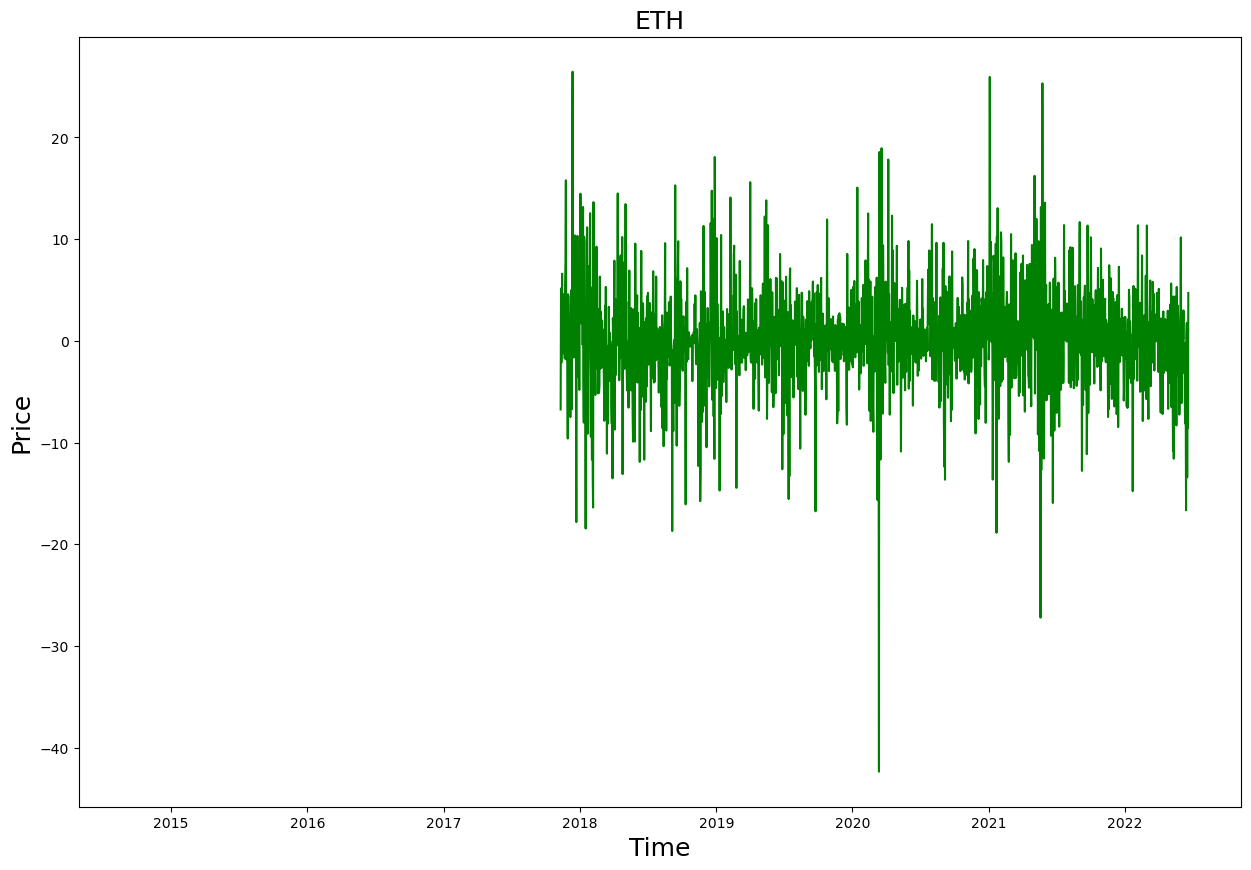

In [34]:
plt.figure(figsize=(15,10))
plt.plot(cr_dr.Date,cr_dr.ETH,c='g')
plt.title('ETH',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

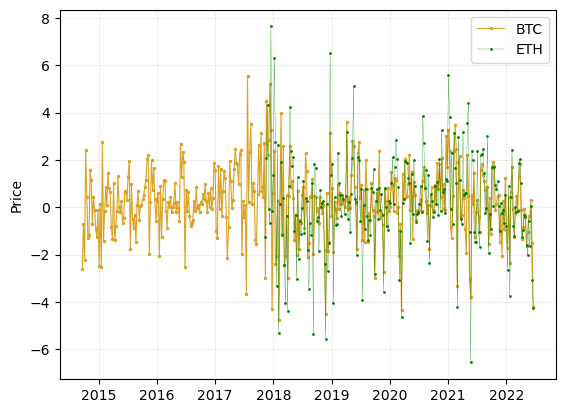

In [35]:
# At the chart this time it didnt display significant decrease which one is in t he daily chart
#so this is a graph date weekly mean chart
start, end = '2017-01', '2017-06'
# Plot two crypto coin weekly mean with weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(cr_dr_weekly_mean.loc['2012':'2022', 'BTC'],
marker='.',markersize=3, linestyle='-', linewidth=0.8, label='BTC',c='#D9A327')
ax.plot(cr_dr_weekly_mean.loc['2016':'2022', 'ETH'],linewidth=0.2,
marker='o', markersize=1, linestyle='-', label='ETH',c='g')
ax.set_ylabel('Price')


ax.grid(which='both')
ax.grid(which='minor',alpha=0.2)
ax.grid(which='major',alpha=0.2)
ax.legend();

**PRACTICE OPPORTUNITY #3:**
- **Plot the daily returns of BTC vs. ADA, choose your favourite color!**

In [36]:
cr_dr.set_index('Date',drop=False,inplace=True)

In [37]:
cr_dr

,Date,BTC,ETH,ADA
Date,,,,
2014-09-17,2014-09-17,0.000000,0.000000,0.000000
2014-09-18,2014-09-18,-7.192558,NaN,NaN
2014-09-19,2014-09-19,-6.984264,NaN,NaN
2014-09-20,2014-09-20,3.573492,NaN,NaN
2014-09-21,2014-09-21,-2.465854,NaN,NaN
...,...,...,...,...
2022-06-15,2022-06-15,1.648355,1.778018,10.097317
2022-06-16,2022-06-16,-9.707194,-13.418330,-10.927140
2022-06-17,2022-06-17,0.440750,1.759673,2.604094


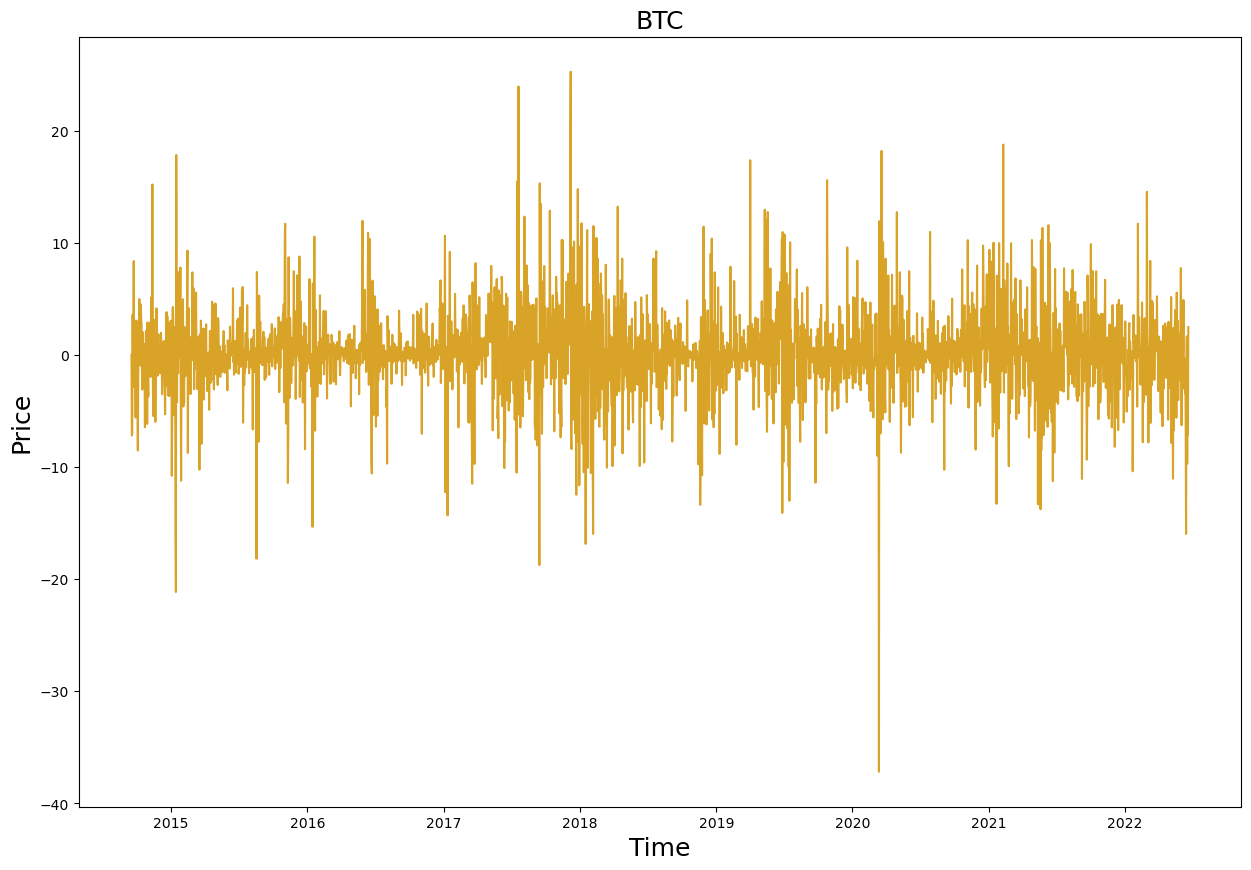

In [38]:
plt.figure(figsize=(15,10))
plt.plot(cr_dr.Date,cr_dr.BTC,c='#D9A327')
plt.title('BTC',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

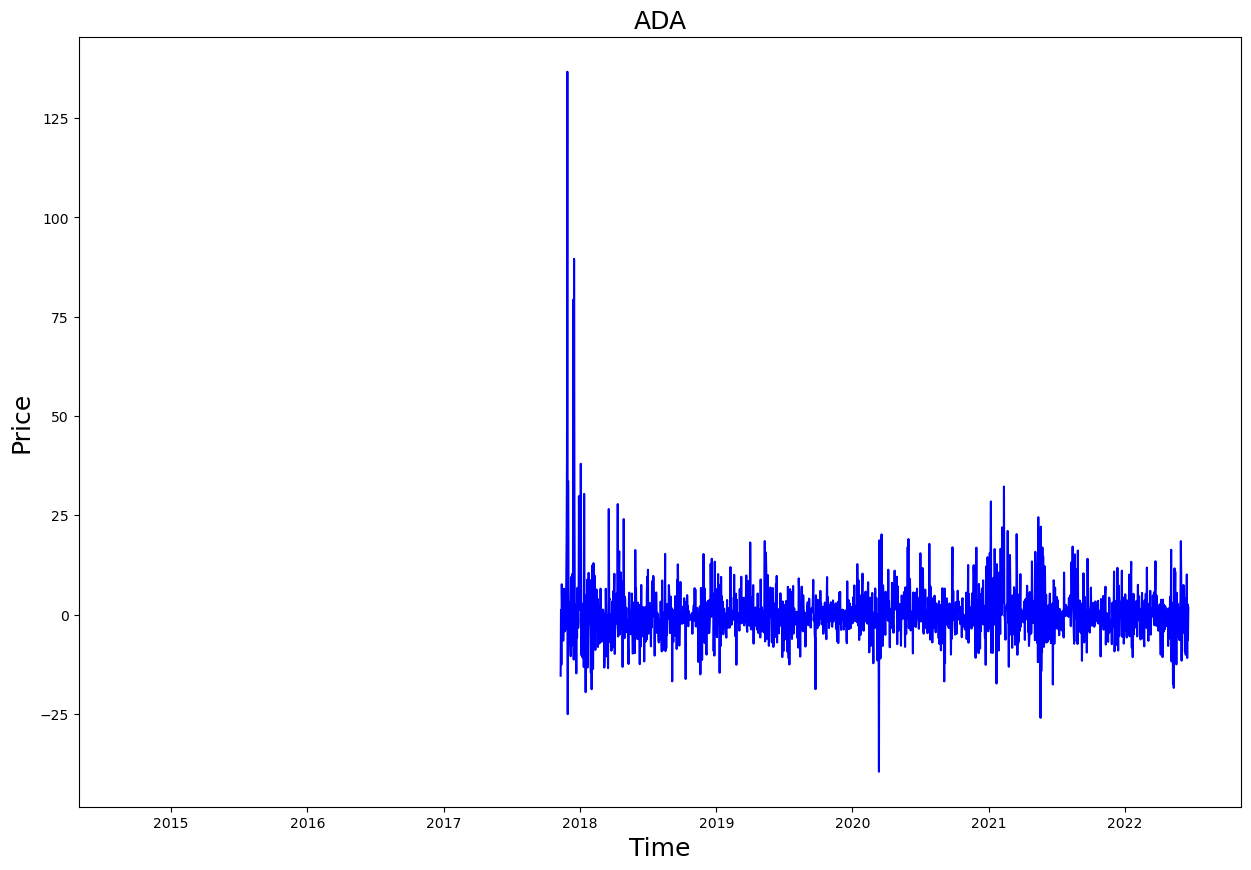

In [39]:
plt.figure(figsize=(15,10))
plt.plot(cr_dr.Date,cr_dr.ADA,c='b')
plt.title('ADA',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

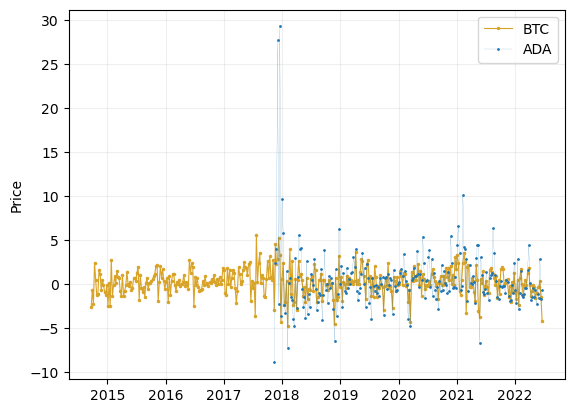

In [40]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(cr_dr_weekly_mean.loc['2012':'2022', 'BTC'],
marker='.',markersize=3, linestyle='-', linewidth=0.8, label='BTC',c='#D9A327')
ax.plot(cr_dr_weekly_mean.loc['2016':'2022', 'ADA'],linewidth=0.1,
marker='o', markersize=1, linestyle='-', label='ADA')
ax.set_ylabel('Price')


ax.grid(which='both')
ax.grid(which='minor',alpha=0.2)
ax.grid(which='major',alpha=0.2)
ax.legend();

## CODING TASK #4. PLOT HISTOGRAMS USING MATPLOTLIB
- **A histogram represents data using bars with various heights**
- **Each bar groups numbers into specific ranges**
- **Taller bars show that more data falls within that specific range**
- **Plot the histogram of the returns**

In [41]:
mu = round(cr_dr['BTC'].mean(), 2) # mean of distribution
sigma = round(cr_dr['BTC'].std(), 2) # standard deviation of distribution
 
num_bins = 40

Date
2020-03-12   -37.169539
2015-01-14   -21.144862
2017-09-14   -18.741101
2015-08-18   -18.178829
2018-01-16   -16.854801
                ...    
2020-03-19    18.187756
2021-02-08    18.746474
2017-12-06    19.928334
2017-07-20    23.936087
2017-12-07    25.247169
Name: BTC, Length: 2833, dtype: float64

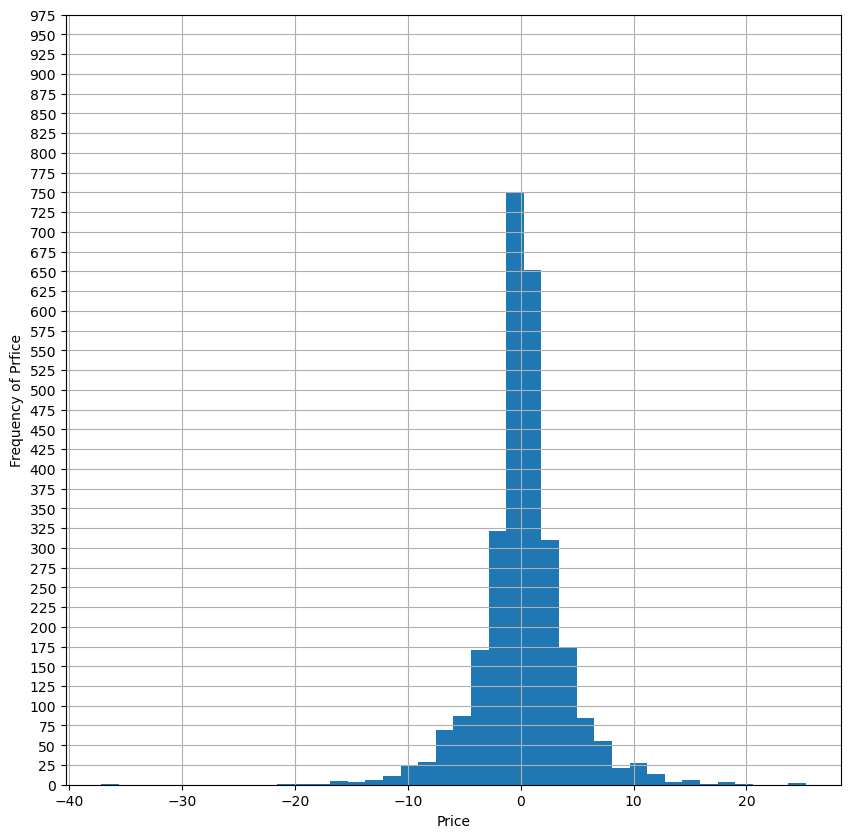

**PRACTICE OPPORTUNITY #4:**
- **Plot the histogram for BTC and ETH returns using 60 bins. Display all histograms on the same figure**


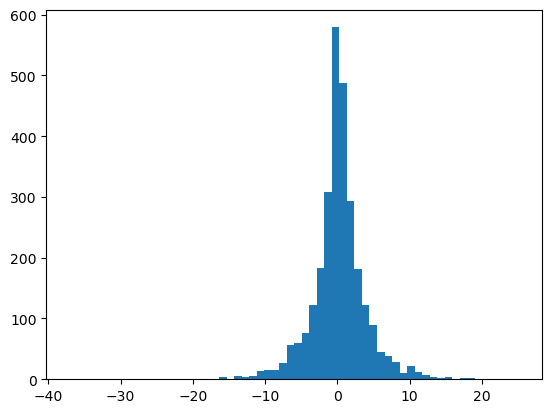

In [44]:
plt.hist(data=cr_dr,x='BTC',bins=60);

''

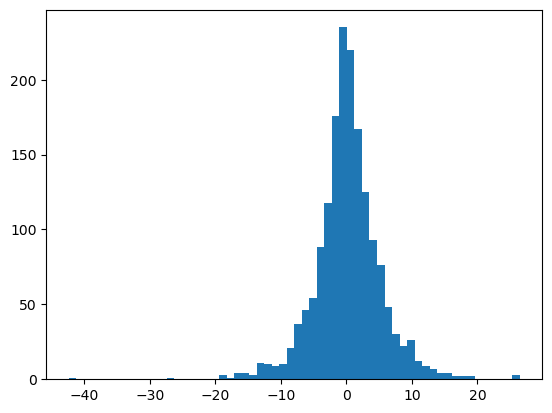

In [45]:
plt.hist(data=cr_dr,x='ETH',bins=60)
;

## CODING TASK #5. PLOT SCATTERPLOT & COUNTPLOT USING SEABORN
- **Seaborn is a visualization library that sits on top of matplotlib**
- **Seaborn offers enhanced features compared to matplotlib**
- **https://seaborn.pydata.org/examples/index.html*/*
- **Check out the head of the dataframe**
- **Check out the tail of the dataframe**
- **Plot scatter plot between mean area and mean smoothness**
- **Let's print out countplot to know how many samples belong to class #0 and #1**

In [46]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [47]:
# Import Cancer data 
cancer_df = pd.read_csv('cancer.csv')

In [48]:
with pd.option_context('display.max_columns', None):
    display(cancer_df.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [49]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [50]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

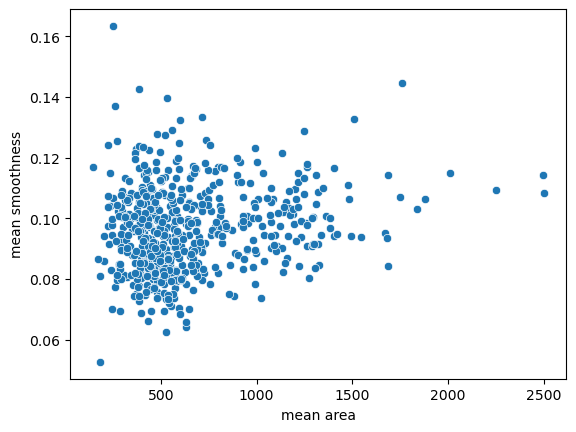

In [51]:
sns.scatterplot(x=cancer_df['mean area'],y=cancer_df['mean smoothness']);

In [52]:
cancer_df.groupby('target').target.count()

target
0    212
1    357
Name: target, dtype: int64

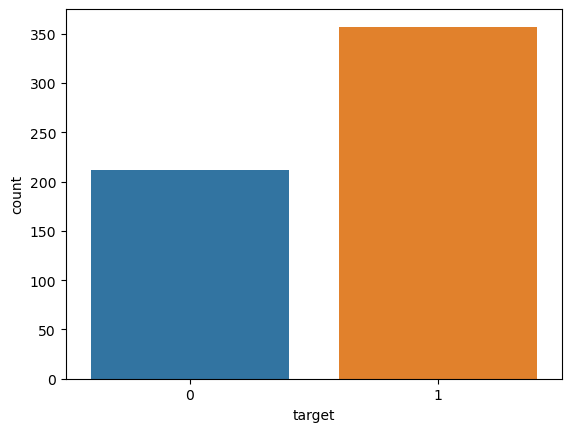

In [53]:
sns.countplot(data= cancer_df,x='target');

**PRACTICE OPPORTUNITY #5:**
- **Plot the scatterplot between the mean radius and mean area. Comment on the plot** 


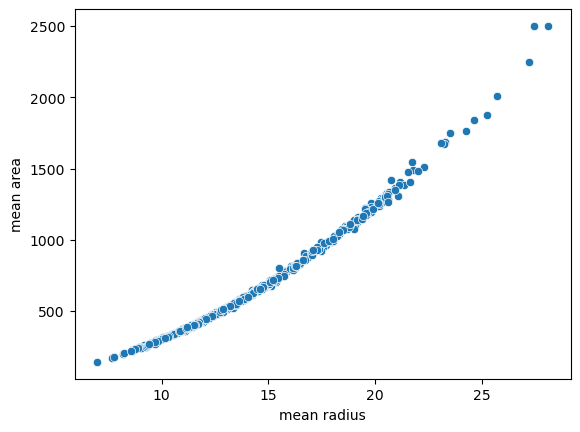

In [54]:
sns.scatterplot(data=cancer_df,x='mean radius',y='mean area');

Calculation of area is computed by square of radious (2*Pi**2), the relationship between mean area and radius is displayed here a exponantial relation similar parabolic not linear. But it is not smooth parabol that is it might not be smooth circle shape and and or may be magnitude relatioship may not be at the square level

## CODING TASK #6. PLOT PAIRPLOT, DISPLOT, AND HEATMAPS/CORRELATIONS USING SEABORN

- **Plot the pairplot**
- **Strong correlation between the mean radius and mean perimeter, mean area and mean primeter**
- **plot the distplot** 
- **Displot combines matplotlib histogram function with kdeplot() (Kernel density estimate)**
- **KDE is used to plot the Probability Density of a continuous variable.** 

In [ ]:
sns.pairplot(cancer_df);

In [ ]:
cancer_df['mean radius'].corr(cancer_df['mean perimeter'])

In [ ]:
cancer_df[['mean radius','mean area','mean perimeter']].corr()[['mean perimeter']]#unless i add ean perimeter cancer_df it didnt work
#so because corr is a relation it numerized relation bt the reference itself so it scaled corr itself 1 then it assign other
#relationship size

In [ ]:
sns.pairplot(cancer_df[[ 'mean radius' ,'mean perimeter', 'mean area']]);


In [ ]:
for i in [ 'mean radius' ,'mean perimeter', 'mean area']:
    sns.displot(data=cancer_df,x=i,kde=True);

**PRACTICE OPPORTUNITY #6:**
- **Plot two separate distplot for each target class #0 and target class #1**


In [ ]:
for i in [ 'mean radius' ,'mean perimeter','mean area']:
    sns.displot(data=cancer_df[cancer_df.target==0],x=i,kde=True).set(title='Target=0');

In [ ]:
for i in [ 'mean radius' ,'mean perimeter','mean area']:
    sns.displot(data=cancer_df[cancer_df.target==0],x=i,kde=True).set(title='Target=0')
    plt.axvline(x=cancer_df[i].mean(),color='r',alpha=0.5,linestyle='--',label=f'Mean value of #{i}#')
    plt.axvline(x=np.median(cancer_df[i]),color='gold',alpha=1,lw=3,linestyle='--',label=f'Median value of #{i}#')
    plt.legend(bbox_to_anchor=[0.7,0.7,0.5,0.5]);

In [ ]:
for i in [ 'mean radius' ,'mean perimeter','mean area']:
    sns.displot(data=cancer_df[cancer_df.target==1],x=i,kde=True).set(title='Target=1')
    plt.axvline(x=cancer_df[i].mean(),color='r',alpha=0.5,linestyle='--',label=f'Mean value of #{i}#')
    plt.axvline(x=np.median(cancer_df[i]),color='gold',alpha=1,lw=3,linestyle='--',label=f'Median value of #{i}#')
    plt.legend(bbox_to_anchor=[0.7,0.7,0.5,0.5]);

# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT 

- In this project, we will visualize stock prices using Seaborn and Matplotlib. 4 Stocks are considered including JP Morgan Chase (JP), Procter and Gamble (P&G) (PG), Apple (AAPL) and United Airlines (UAL).
- Using the stock_daily_prices.csv and stocks_daily_returns.csv dataset included in the course/workshop package, please do the following:
    - Import both datasets using Pandas.
    - Using Matplotlib, plot lineplots that display all 4 stocks daily prices on one single figure.
    - Using Matplotlib, plot 4 stocks daily prices on multiple subplots.
    - Using Matplotlib, plot the 4 plots on subplots next to each other (all figures in one row).
    - Using Matplotlib, plot the scatterplot between Apple and JP Morgan daily returns. 
    - Using Seaborn, plot similar scatterplot between Apple and JP Morgan daily returns. 
    - Assume that you decided to become bullish on AAPL and you allocated 70% of your assets in it. You also decided to equally divide the rest of your assets in other stocks (JPM, PG, and UAL). Using Matplotlib, plot a pie chart that shows these allocations. Use 'explode’ attribute to increase the separation between AAPL and the rest of the portfolio.
    - Using Matplotlib, plot the histogram for United Airlines and P&G returns using 40 bins with red color. Display the mean and Standard deviation for both stocks on top of the figure. What did you conclude from this graph?
    - Using Seaborn, plot a heatmap that shows the correlations between stocks daily returns. Comment on the correlation between UAL and P&G.
    - Plot a 3D plot showing all daily returns from JPM, AAPL and UAL [External Research is required].